In [3]:
import pymysql.cursors
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import connect_to_db as cn

In [53]:
def draw_cdf(np_result):
    fig = plt.figure(figsize=(15,10))
    fig.set_facecolor('white')
    ax = fig.add_subplot()
    
    sorted_data = np.sort(np_result)
    plt.step(sorted_data, np.arange(sorted_data.size), cumulative=True, density=True)

    # plt.xscale('symlog')

    plt.show()

In [35]:
def draw_multiple_cdf(np_result_list):
    fig = plt.figure(figsize=(15,10))
    fig.set_facecolor('white')
    ax = fig.add_subplot()
    
    for np_result in np_result_list:
        sorted_data = np.sort(np_result)
        plt.step(sorted_data, np.arange(sorted_data.size))
  
    plt.legend()
    plt.show()

In [69]:
def draw_cdf4(np_result):
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    kwargs = {'cumulative': True}
    sns.distplot(np_result, hist_kws=kwargs, kde_kws=kwargs, hist=False, norm_hist=False)

In [32]:
sql = 'select * from mentor;'
result_df = cn.select_query_result_to_df(sql)
result_df

,author,comment_cnt,mentee_cnt,average_is_score,average_es_score,comments_similarity,posts_similarity,is_score_entropy,es_score_entropy,average_vote
0,_________________UWU,1,1,2.00000000,2.00000000,None,None,0E-8,0E-8,1.00000
1,______________Blank,1,1,2.00000000,2.00000000,None,None,0E-8,0E-8,1.00000
2,_________-----------,1,1,3.00000000,1.00000000,None,None,0E-8,0E-8,1.00000
3,_________ez_________,1,1,1.00000000,2.00000000,None,None,0E-8,0E-8,1.00000
4,_______woohoo,1,1,1.00000000,2.00000000,None,None,0E-8,0E-8,3.00000
...,...,...,...,...,...,...,...,...,...,...
461352,Zzzzz315,1,1,1.00000000,3.00000000,None,None,0E-8,0E-8,1.00000
461353,zzzzzima,2,2,2.00000000,2.00000000,0.16390613,0E-8,0E-8,0.63092975,13.00000
461354,zzzzzsleepyzzzzz,2,2,1.50000000,1.50000000,0.03616722,0.04416443,0.63092975,0.63092975,1.50000
461355,zzzzzzz____,2,2,1.00000000,2.00000000,0.23076793,0E-8,0E-8,0E-8,1.50000


No handles with labels found to put in legend.


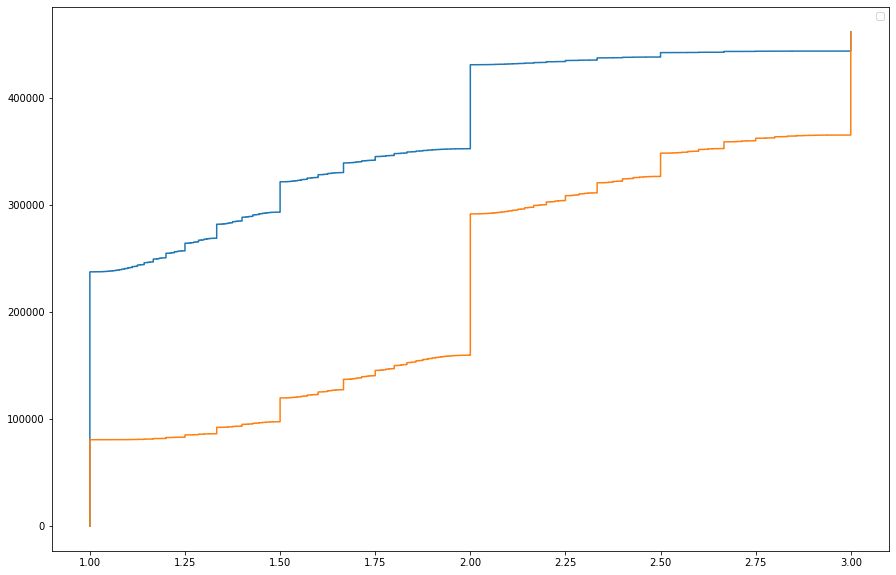

In [33]:
np_result_list = []
np_result_list.append(np.array(result_df['average_is_score'].tolist()))
np_result_list.append(np.array(result_df['average_es_score'].tolist()))
# colors = ['red', 'blue']
# legends = ['average_is_score', 'average_es_score']
draw_multiple_cdf(np_result_list)

/home/mykim/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


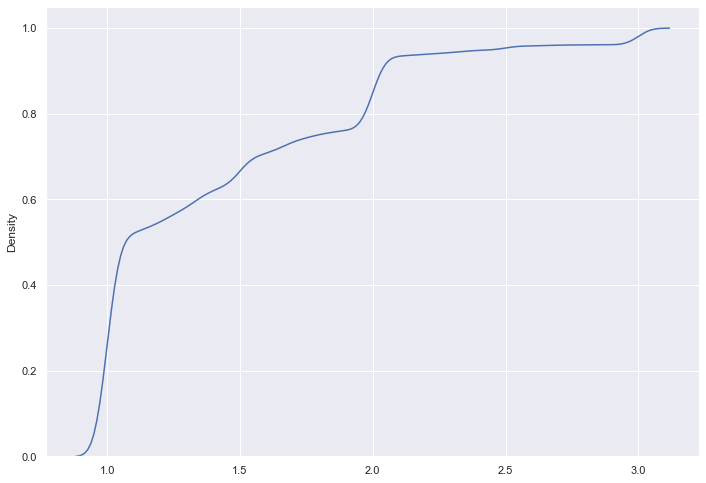

In [70]:
np_result1 = np.array(result_df['average_is_score'].tolist())
draw_cdf4(np_result1)